In [1]:
import numpy as np

In [2]:
X = np.load("moon-all-input.npy")
y = np.load("moon-all-output.npy")

### 1.

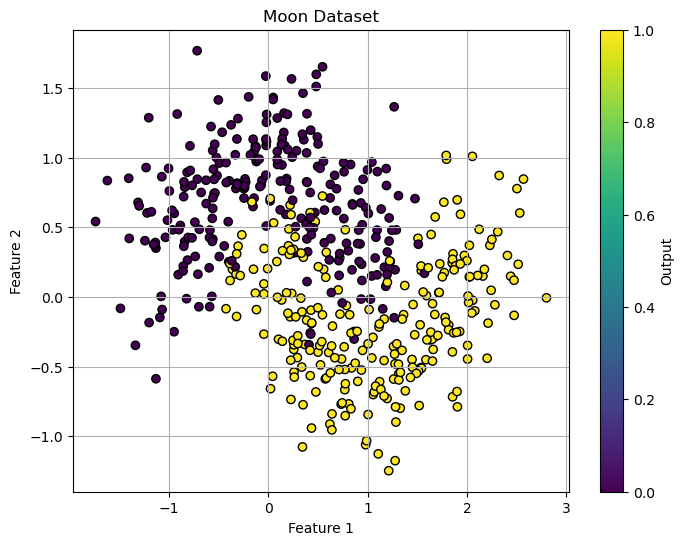

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

plt.title('Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Output')
plt.grid(True)
plt.show()


### 2.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
len(X_train), len(X_test)

(375, 125)

### 3.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [9]:
wts = (np.arange(len(X_train)) + 1) / len(X_train)
learning_rate = 1

classifier_quantities = []
ensemble_predictions = []

dt_clf = DecisionTreeClassifier(max_depth=1, random_state=42)

In [10]:
def kthClassifier(wts):
    
    dt_clf.fit(X_train, y_train, sample_weight=wts)
    pred_vals = dt_clf.predict(X_train)
    preds = (pred_vals == y_train)
    weighted_error_rate = np.sum(wts[~preds])/np.sum(wts)
    classifierWt = learning_rate*np.log((1-weighted_error_rate)/weighted_error_rate)
    
    accuracy_train = accuracy_score(y_train, pred_vals)
    classifier_quantities.append([classifierWt, wts, weighted_error_rate, accuracy_train])
    
    wts[~preds] *= np.exp(classifierWt)  # updating the weights for next classifier
    wts = wts / np.sum(wts) # normalizing the weights
       
    testset_preds_vals =dt_clf.predict(X_test)
    accuracy_test = accuracy_score(y_test, testset_preds_vals)
    ensemble_predictions.append([accuracy_train, accuracy_test])
    return wts

In [11]:
for i in range(3000):
    wts = kthClassifier(wts)

### 4.

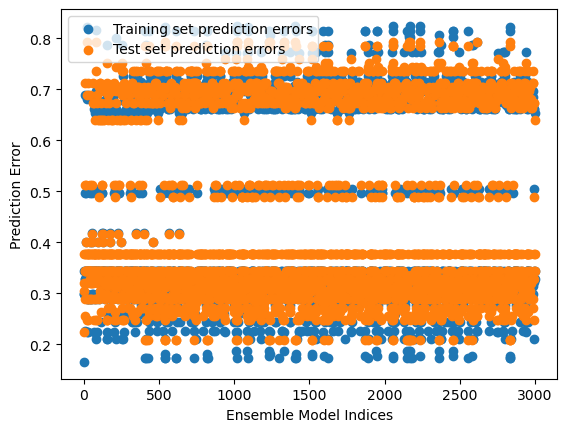

In [12]:
import matplotlib.pyplot as plt

train_pred_errors = 1 - np.array([item[0] for item in ensemble_predictions])
test_pred_errors = 1 -  np.array([item[1] for item in ensemble_predictions])

plt.scatter(np.arange(3000), train_pred_errors, label='Training set prediction errors')
plt.scatter(np.arange(3000), test_pred_errors, label='Test set prediction errors')

plt.xlabel('Ensemble Model Indices')
plt.ylabel('Prediction Error')
plt.legend()
plt.show()

#### plot for the first 200 ensemble models

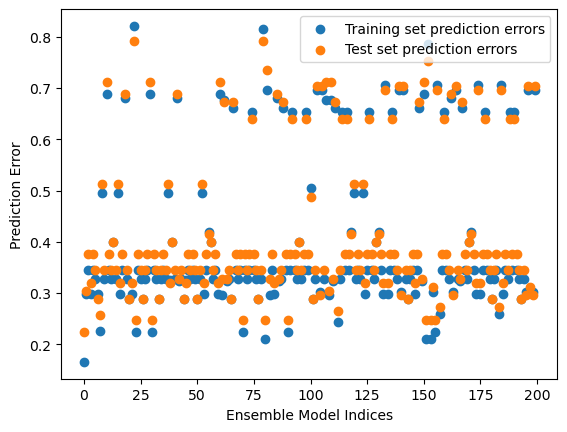

In [13]:
train_pred_errors = 1 - np.array([item[0] for item in ensemble_predictions])
test_pred_errors = 1 -  np.array([item[1] for item in ensemble_predictions])

plt.scatter(np.arange(200), train_pred_errors[:200], label='Training set prediction errors')
plt.scatter(np.arange(200), test_pred_errors[:200], label='Test set prediction errors')

plt.xlabel('Ensemble Model Indices')
plt.ylabel('Prediction Error')
plt.legend()
plt.show()

### 5.

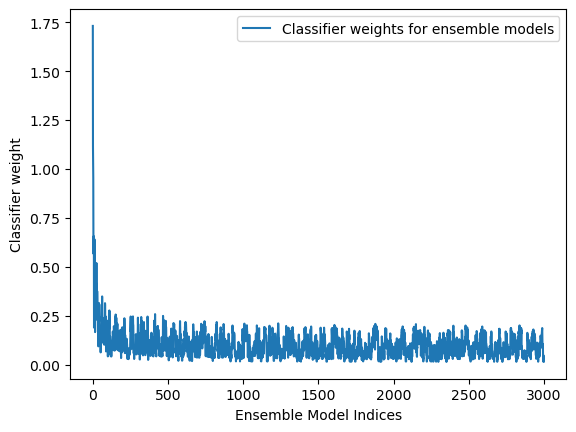

In [14]:
classifier_wts = np.array([item[0] for item in classifier_quantities])

plt.plot(np.arange(3000), classifier_wts, label='Classifier weights for ensemble models')
plt.xlabel('Ensemble Model Indices')
plt.ylabel('Classifier weight')
plt.legend()
plt.show()

#### for the first 200 ensemble models

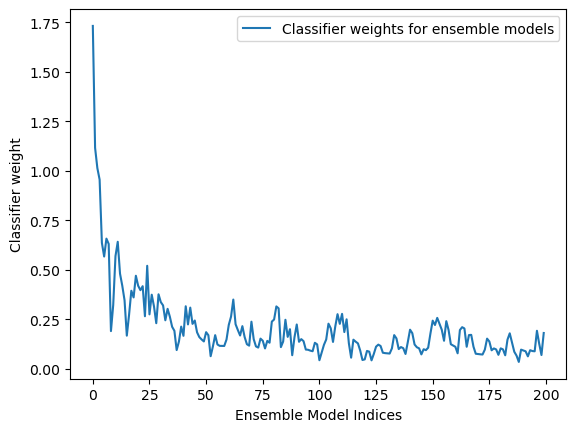

In [15]:
plt.plot(np.arange(200), classifier_wts[:200], label='Classifier weights for ensemble models')
plt.xlabel('Ensemble Model Indices')
plt.ylabel('Classifier weight')
plt.legend()
plt.show()

### 6.

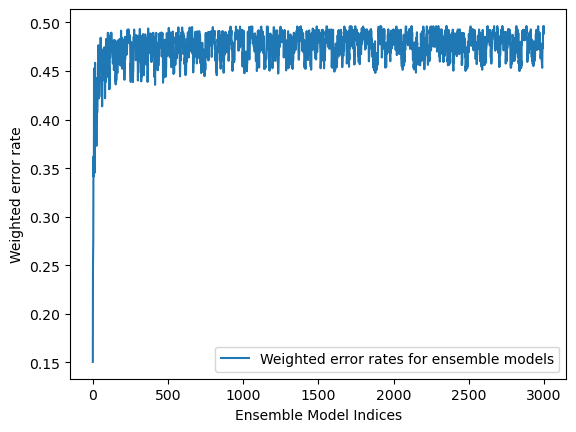

In [16]:
wt_error_rates = np.array([item[2] for item in classifier_quantities])

plt.plot(np.arange(3000), wt_error_rates, label='Weighted error rates for ensemble models')
plt.xlabel('Ensemble Model Indices')
plt.ylabel('Weighted error rate')
plt.legend()
plt.show()

#### Weighted error rates for the first 200 models:

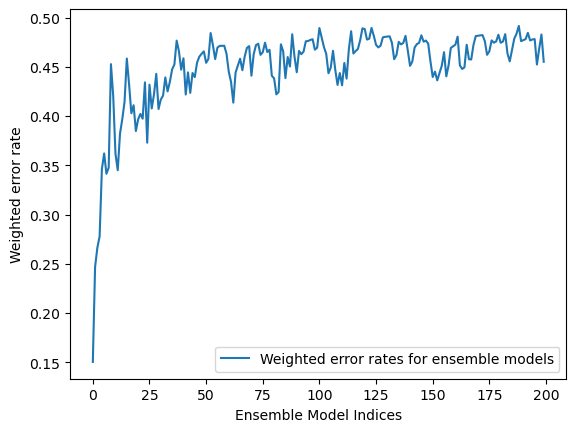

In [17]:
plt.plot(np.arange(200), wt_error_rates[:200], label='Weighted error rates for ensemble models')
plt.xlabel('Ensemble Model Indices')
plt.ylabel('Weighted error rate')
plt.legend()
plt.show()

### 7.

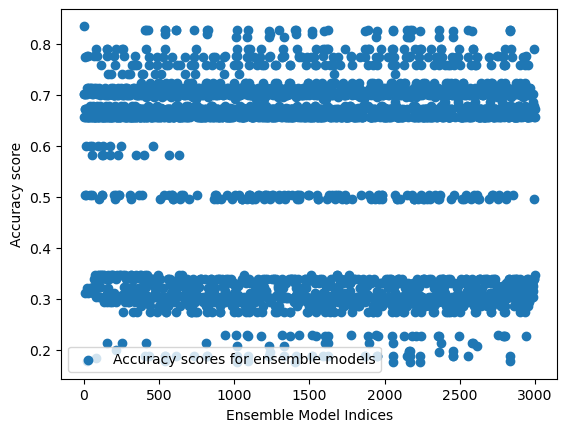

In [18]:
acc_scores = np.array([item[3] for item in classifier_quantities])

plt.scatter(np.arange(3000), acc_scores, label='Accuracy scores for ensemble models')
plt.xlabel('Ensemble Model Indices')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

#### Accuracy scores for the first 200 models

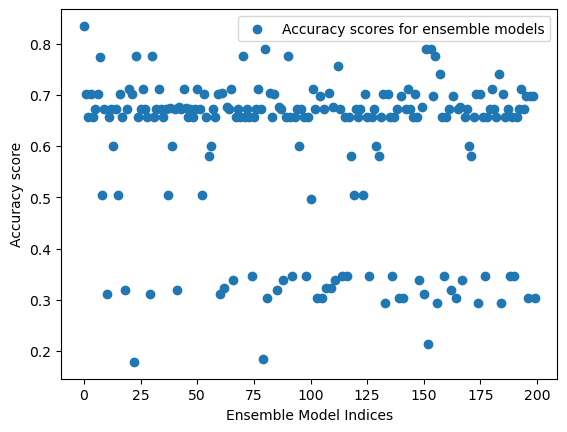

In [19]:
plt.scatter(np.arange(200), acc_scores[:200], label='Accuracy scores for ensemble models')
plt.xlabel('Ensemble Model Indices')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

### 8.

In [32]:
indices = [0, 1, 2, 3, 4, 14, 20, 50, 100, 1000]
from sklearn.tree import plot_tree

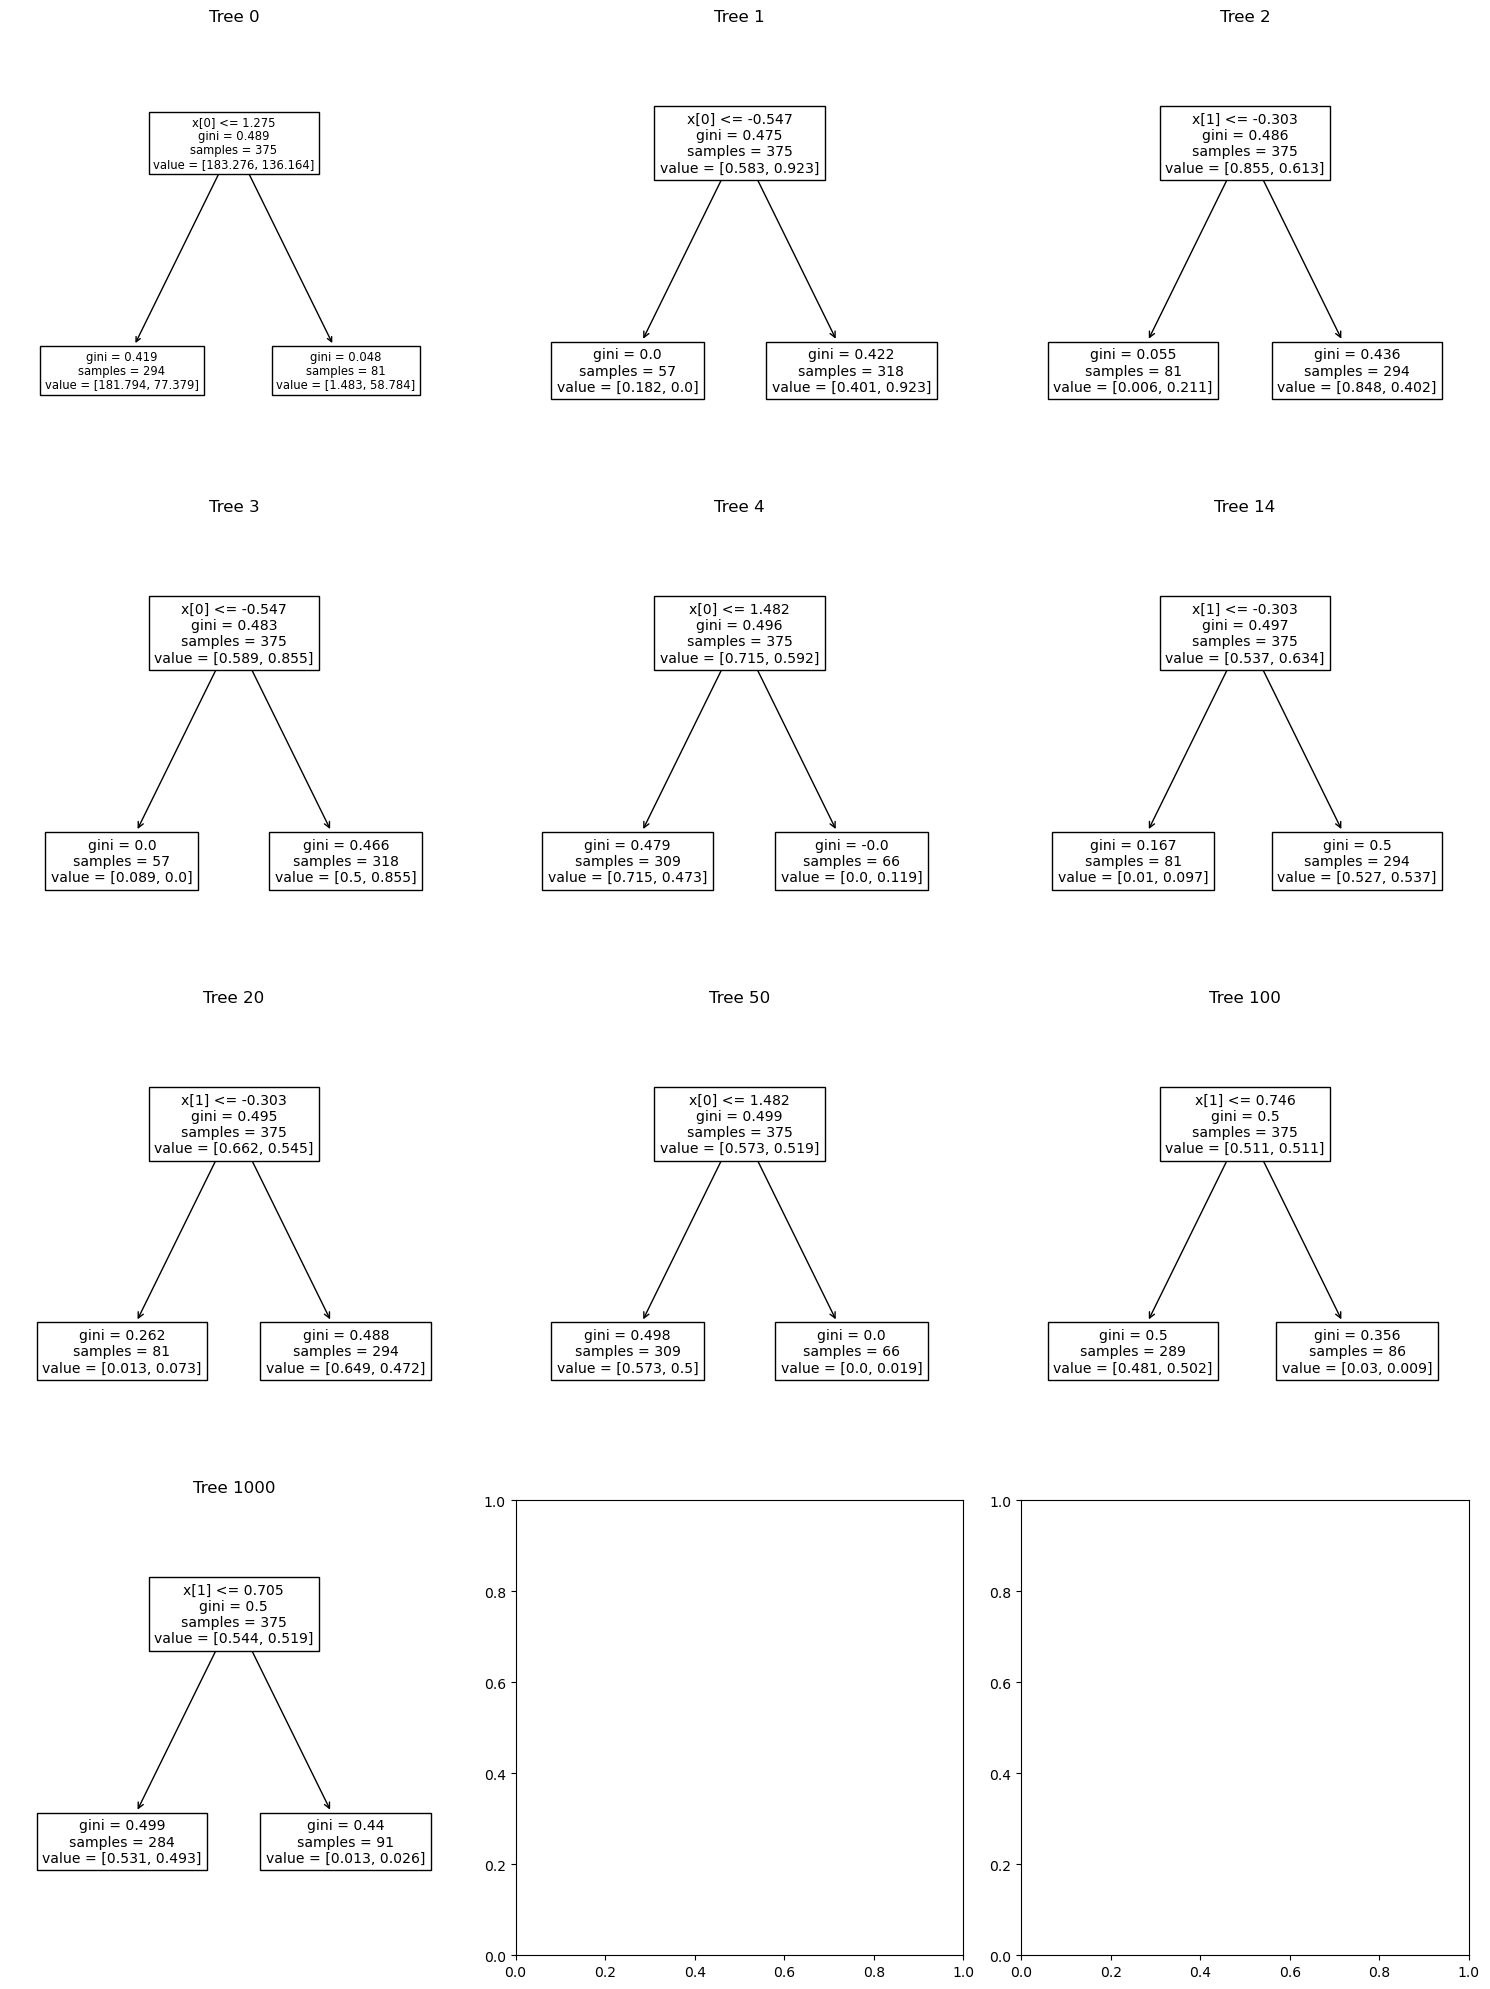

In [33]:
num_plots = len(indices)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

for i, idx in enumerate(indices):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    clf = dt_clf.fit(X_train, y_train, sample_weight=classifier_quantities[idx][1])
    plot_tree(clf, ax=ax)
    ax.set_title(f"Tree {idx}")

plt.tight_layout()
plt.show()

#### Plotting decision boundaries:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True, ax=None):
    if ax is None:
        plt.figure()
        ax = plt.gca()
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    ax.axis(axes)
    ax.set_xlabel(r"$x_1$", fontsize=18)
    ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)


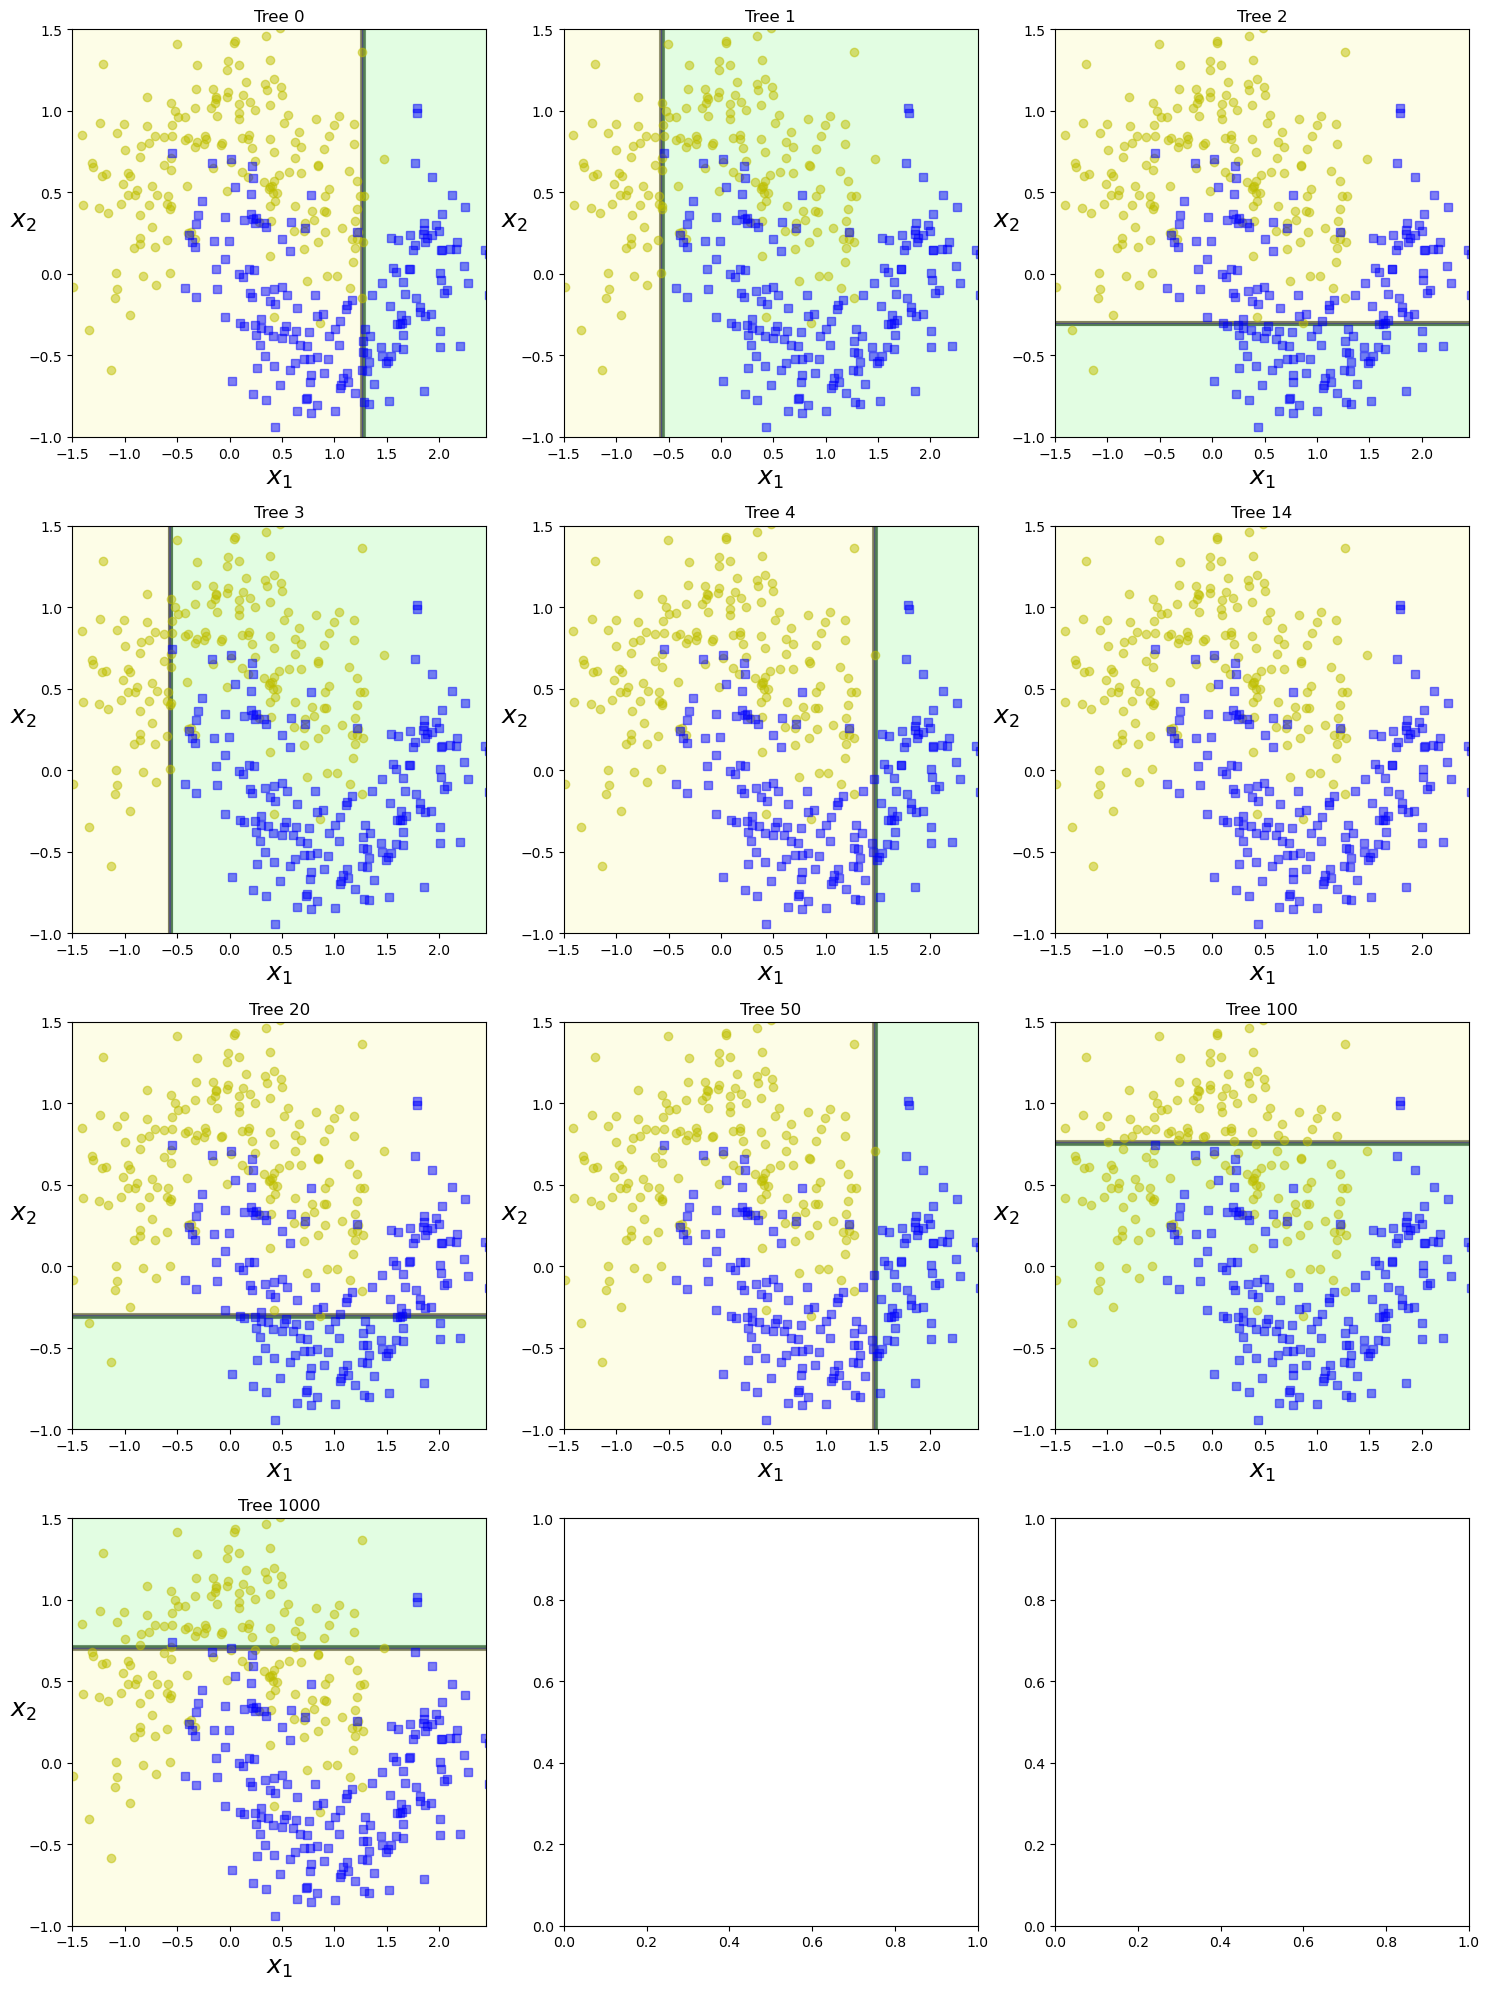

In [35]:
num_plots = len(indices)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

for i, idx in enumerate(indices):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    clf = dt_clf.fit(X_train, y_train, sample_weight=classifier_quantities[idx][1])
    plot_decision_boundary(clf, X_train, y_train, ax=ax)
    ax.set_title(f"Tree {idx}")
plt.tight_layout()
plt.show()

#### Plotting the instance weights used to train each of the tree:

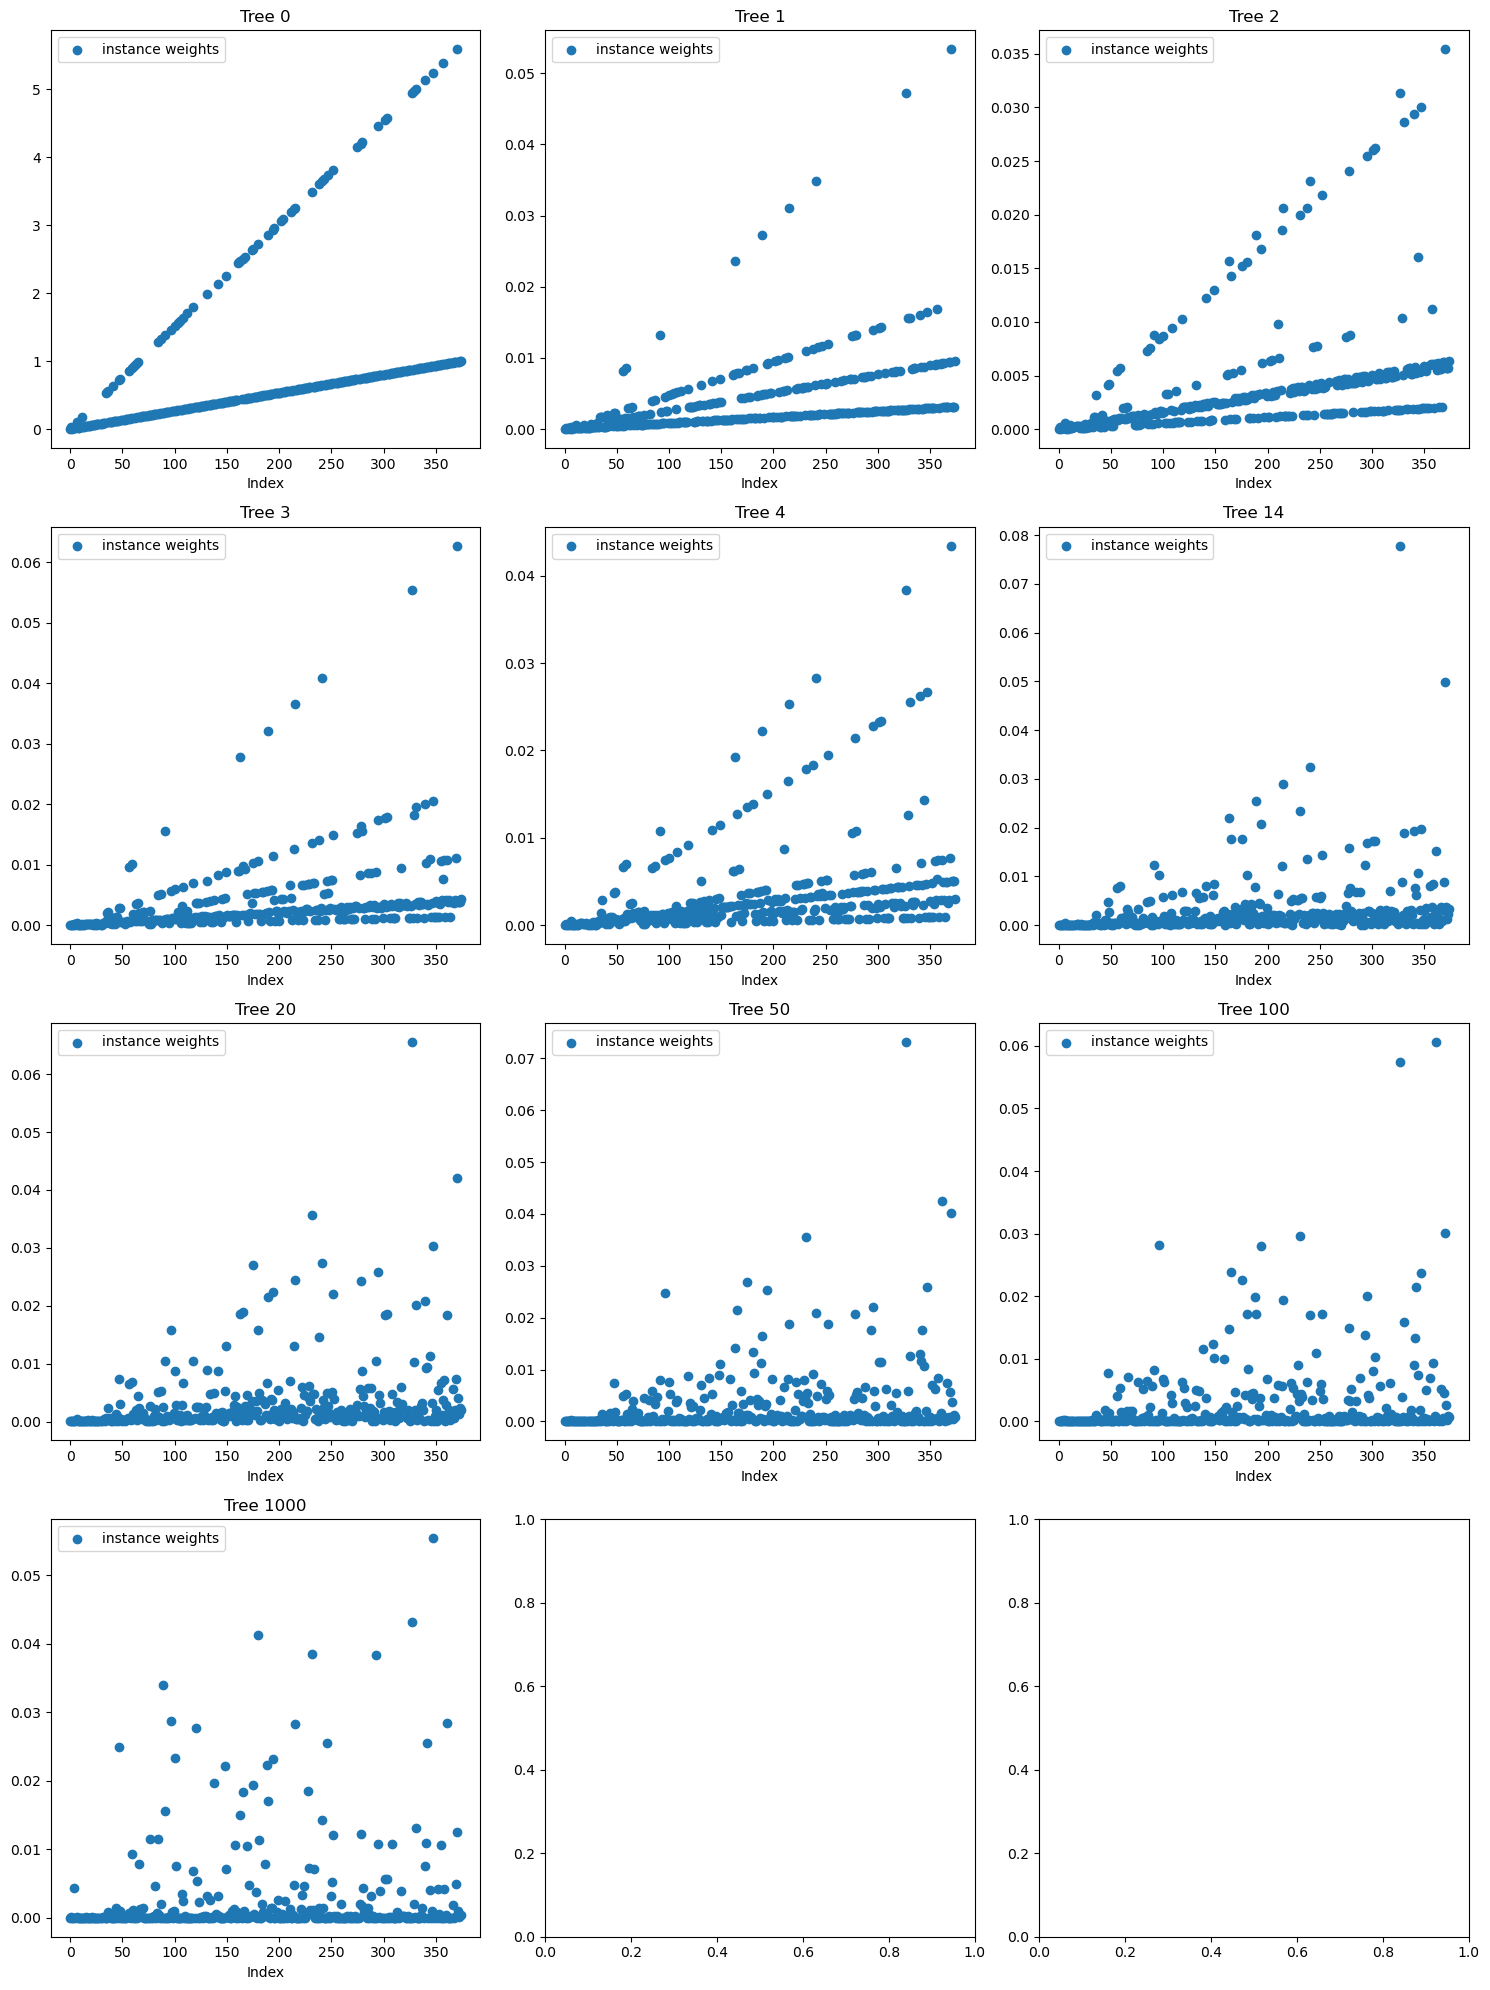

In [36]:
num_plots = len(indices)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

for i, idx in enumerate(indices):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    x1s = np.arange(len(X_train))
    ax.scatter(x1s, classifier_quantities[idx][1], label="instance weights")
    ax.set_xlabel('Index')
    ax.legend()
    ax.set_title(f"Tree {idx}")

plt.tight_layout()
plt.show()


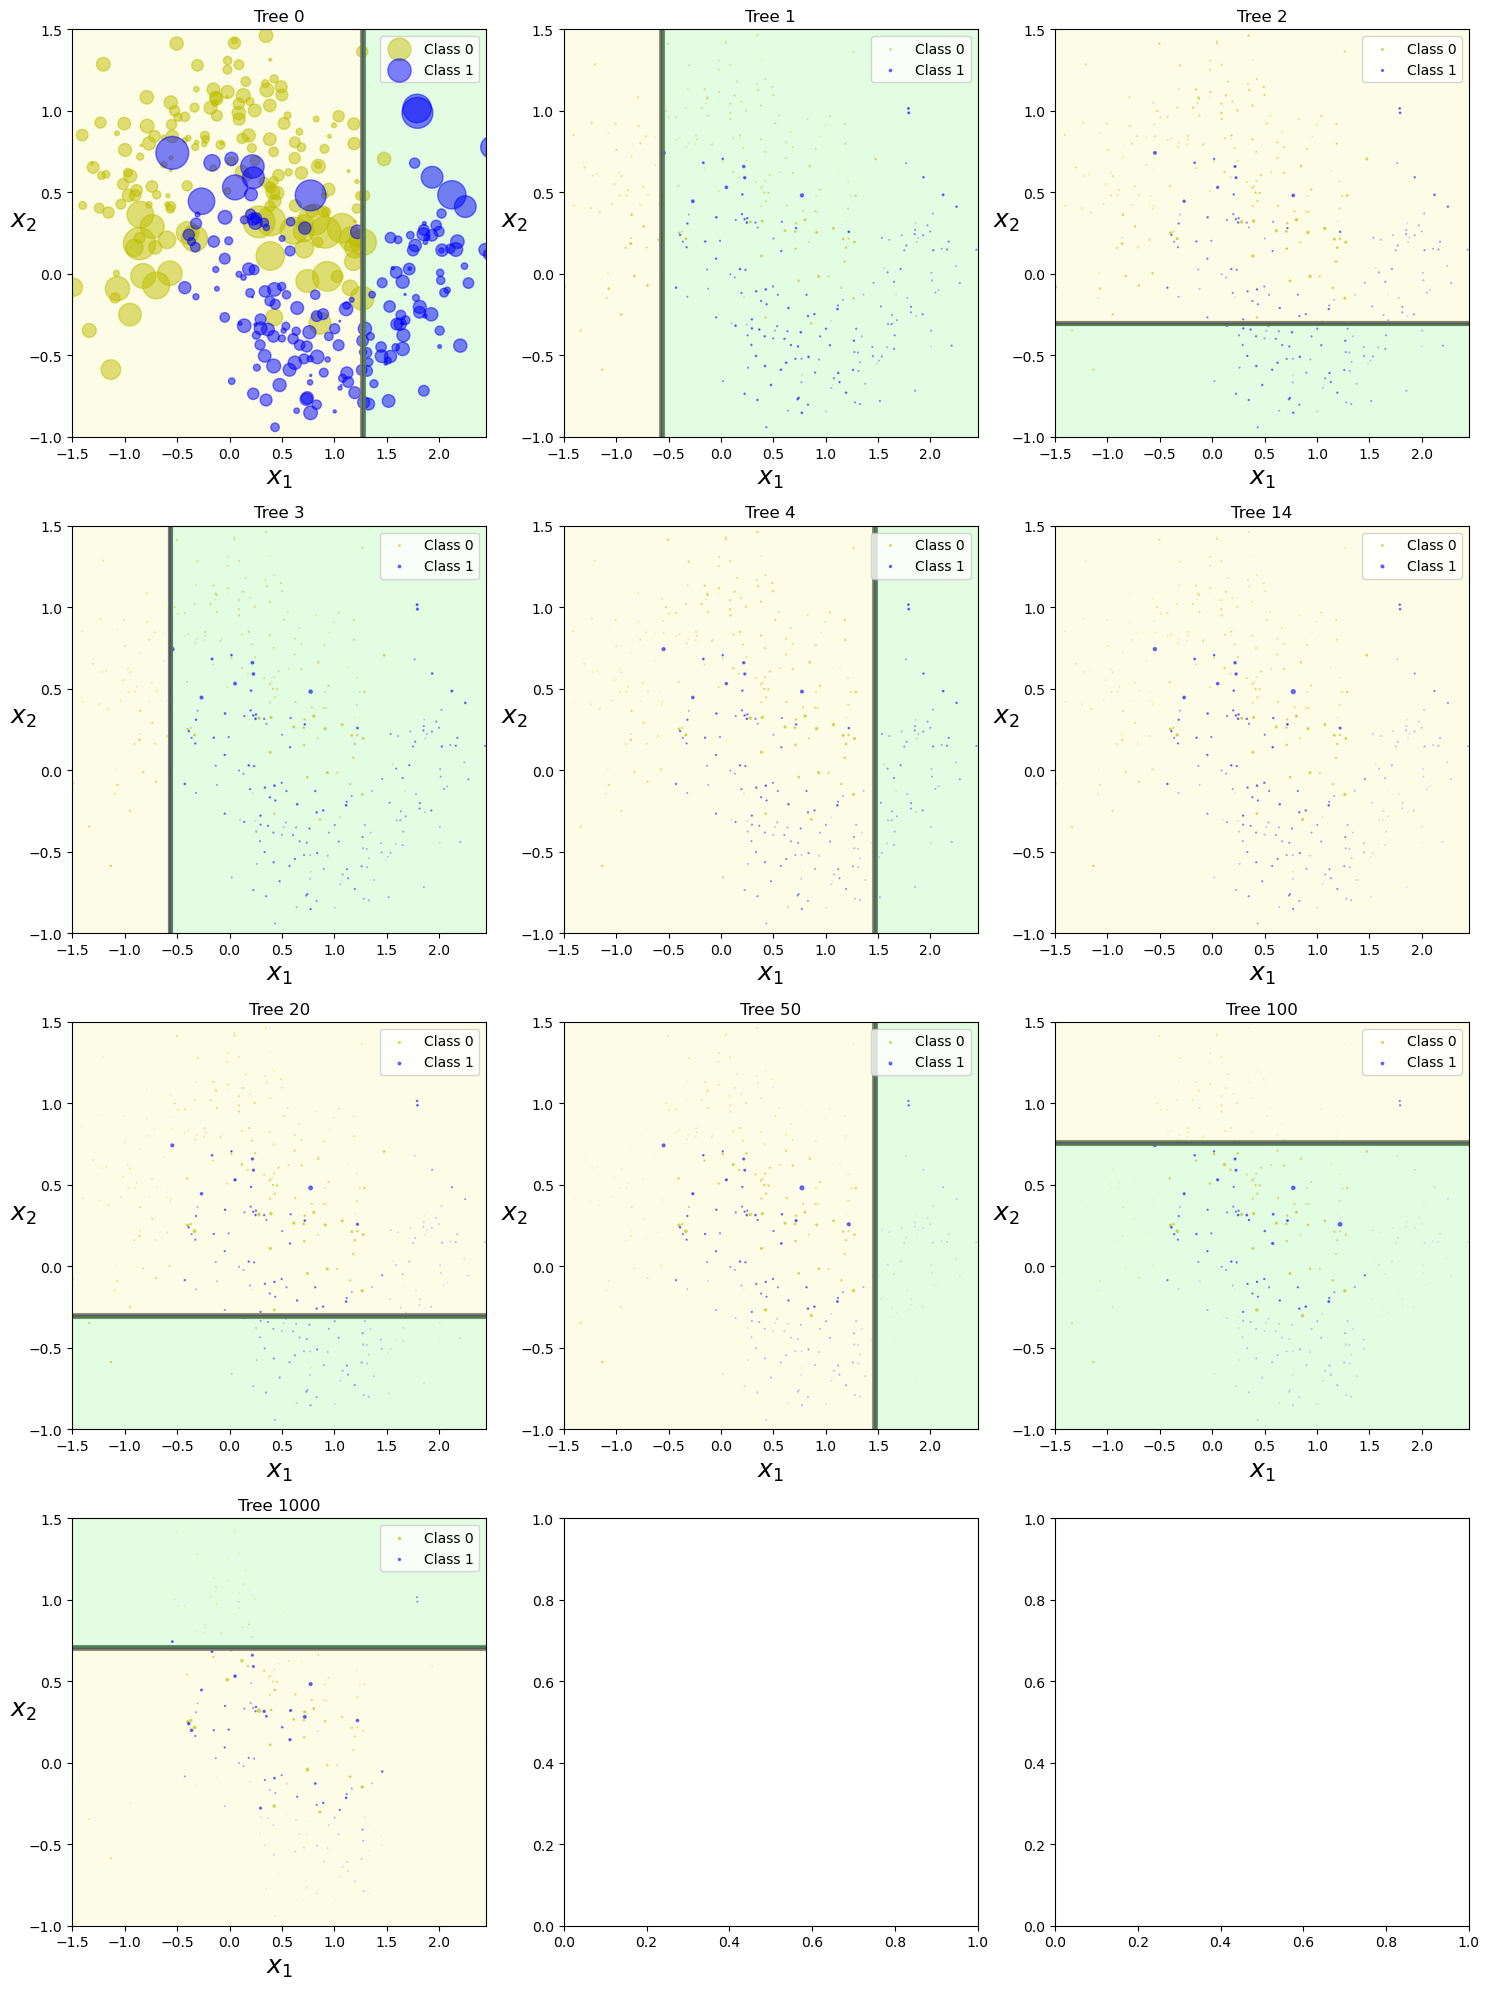

In [37]:
def plot_decision_boundary_scaled(clf, X, y, wts, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True, ax=None):
    if ax is None:
        plt.figure()
        ax = plt.gca()
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        ax.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c="y", s=100 * wts[y==0], alpha=alpha, label="Class 0")
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c="b", s=100 * wts[y==1], alpha=alpha, label="Class 1")
    ax.axis(axes)
    ax.set_xlabel(r"$x_1$", fontsize=18)
    ax.set_ylabel(r"$x_2$", fontsize=18, rotation=0)
    ax.legend()

# Usage
num_plots = len(indices)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

for i, idx in enumerate(indices):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    clf = dt_clf.fit(X_train, y_train, sample_weight=classifier_quantities[idx][1])
    plot_decision_boundary_scaled(clf, X_train, y_train, classifier_quantities[idx][1], ax=ax)
    ax.set_title(f"Tree {idx}")
plt.tight_layout()
plt.show()


### 9.

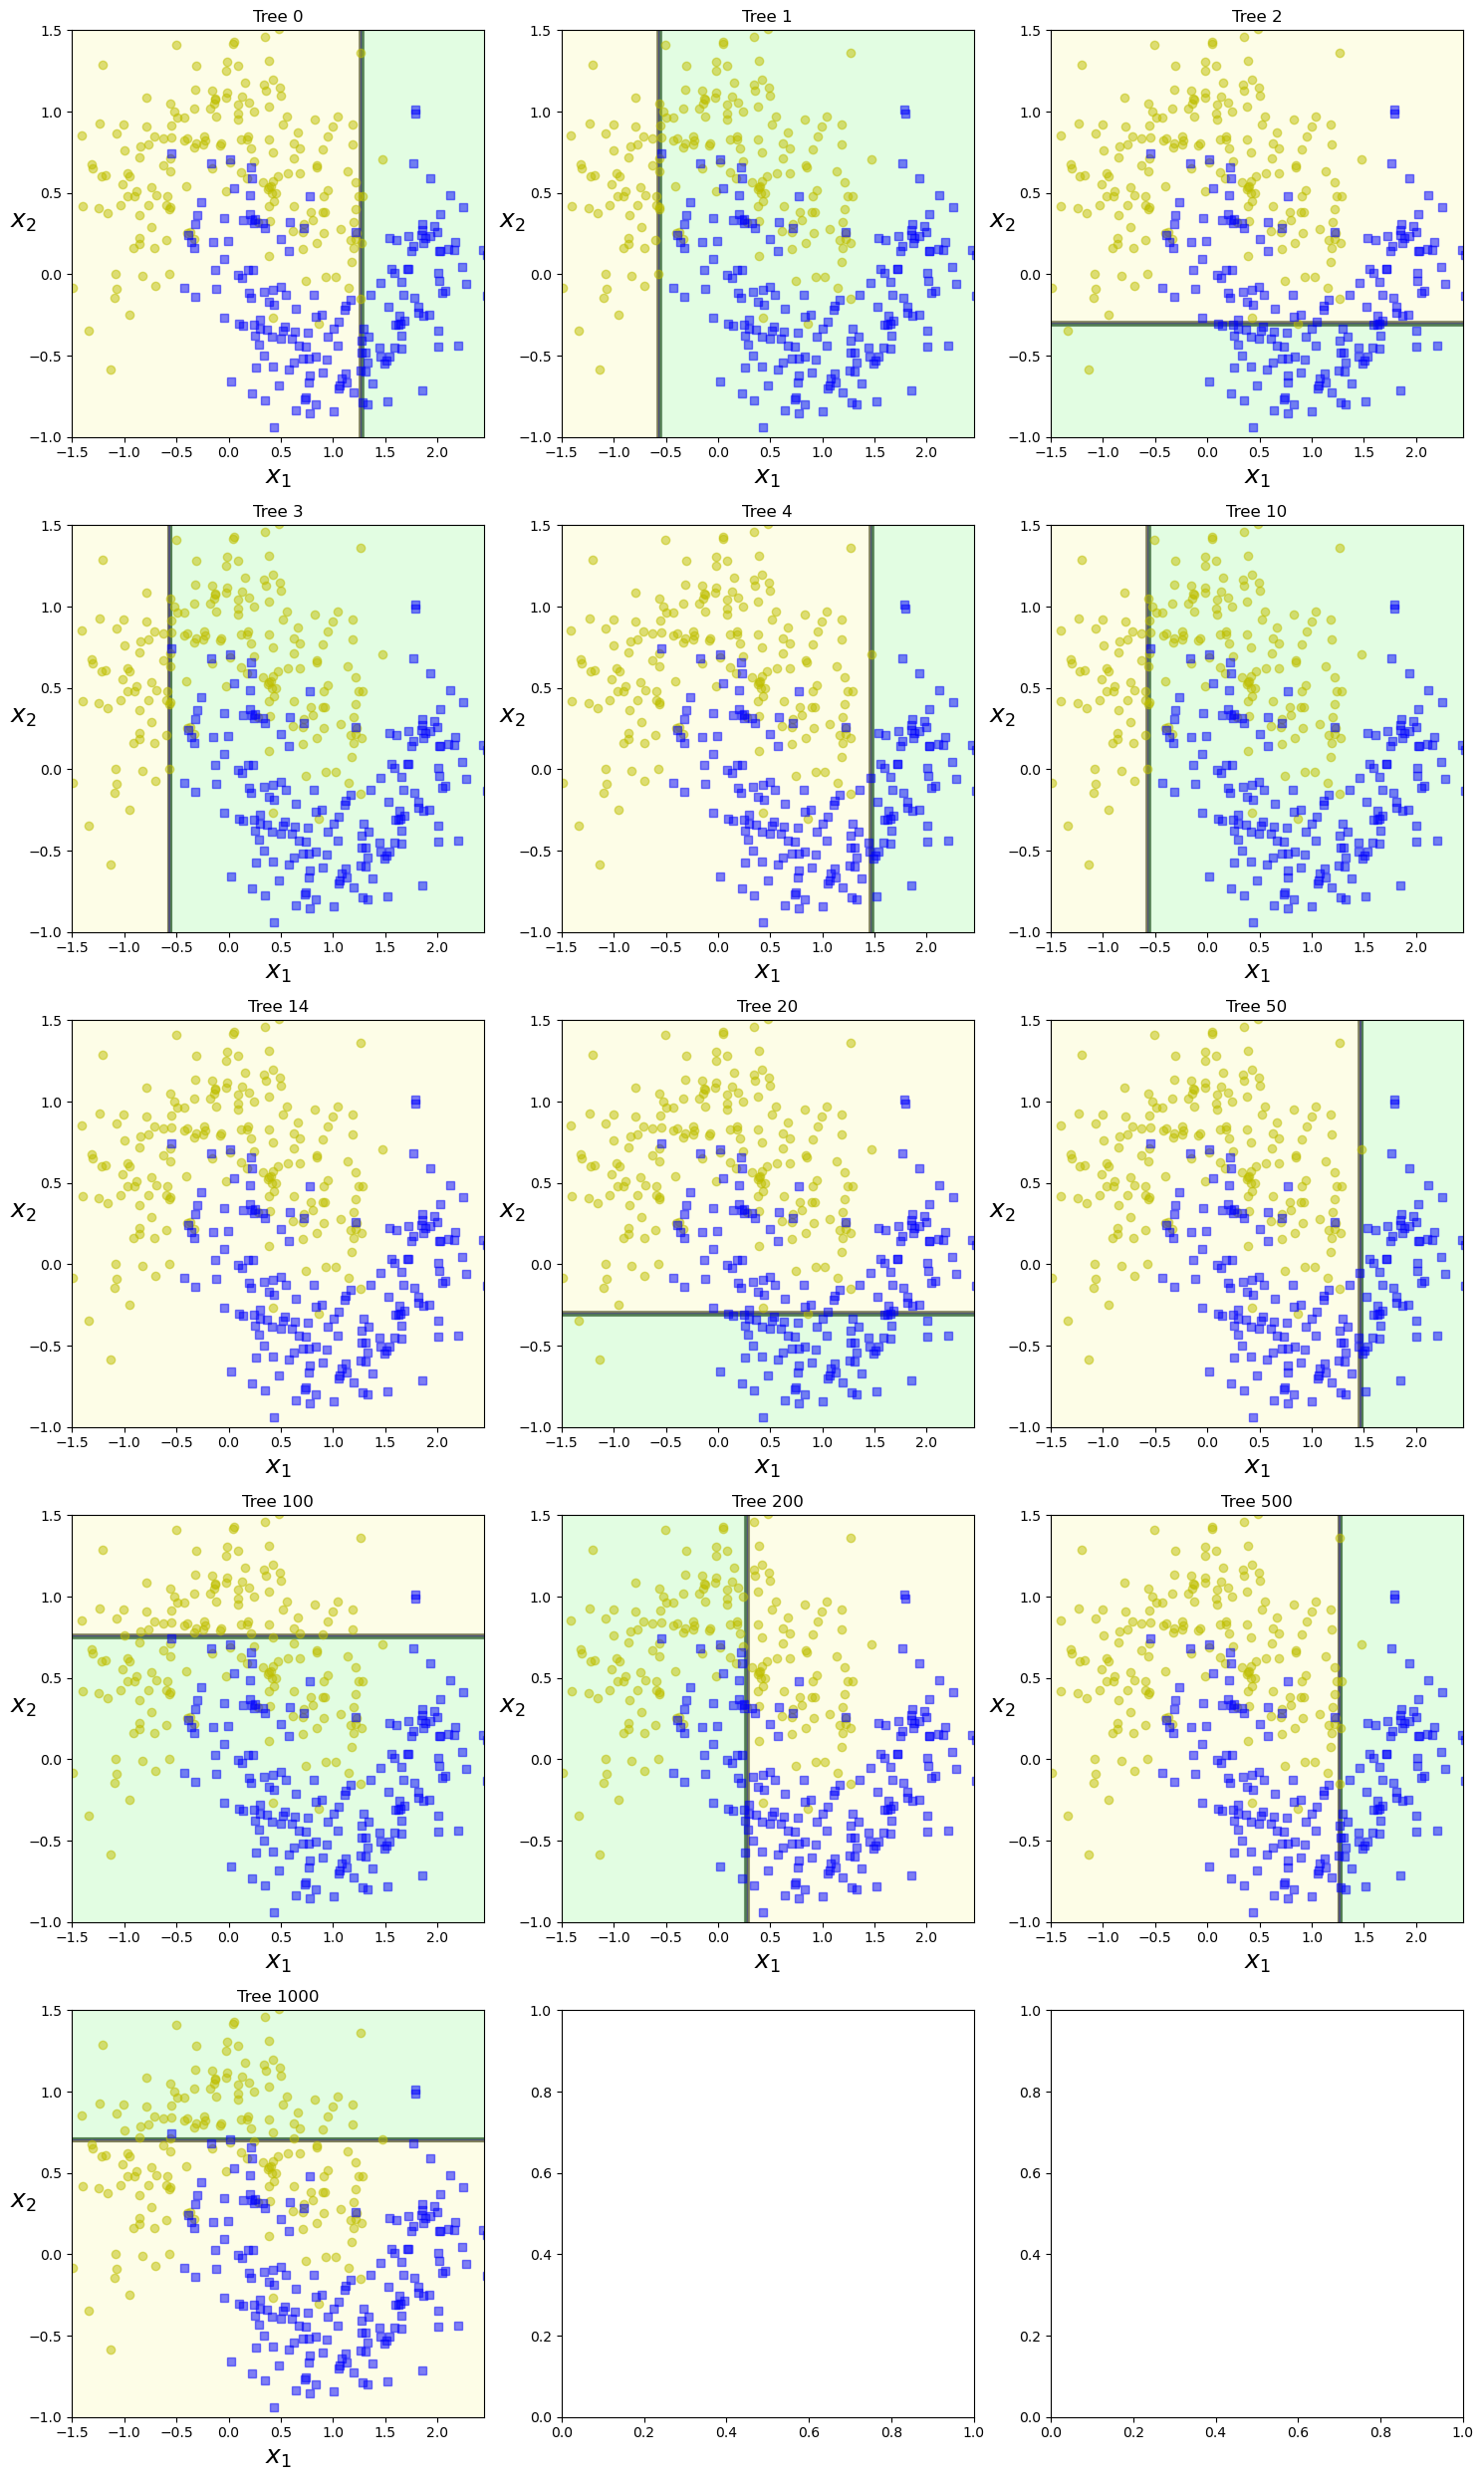

In [38]:
indices = [0, 1, 2, 3, 4, 10, 14, 20, 50, 100, 200, 500, 1000]
num_plots = len(indices)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

for i, idx in enumerate(indices):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    clf = dt_clf.fit(X_train, y_train, sample_weight=classifier_quantities[idx][1])
    plot_decision_boundary(clf, X_train, y_train, ax=ax)
    ax.set_title(f"Tree {idx}")
plt.tight_layout()
plt.show()

### 10.

In this assignment, I have learnt how to build ensemble models using base classifiers. Specifically, I understood the working of an ADA Bosst classifier. I understood how to build stonger classifiers utilizing the smaller weaker ones like in the one above. 